# Model selection

Now that we know how to measure model performance it is time to select the right model and make sure it is properly parameterized.

I guess all of you can think of a straightforward way to do it:

1) Select a few models you think could work well on the problem
2) Select the proper metric to measure model performance
3) Fit all models, look at the performance using your metric and select the top scoring one.

But it is not always that simple! 

## Selecting the right model

![model selection diagram](images/model_selection_scikit.png)

This is the image from the [scikit-learn documentation](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) showing how many different algorithms are there just in this one library. And keep in mind that for every model you see here there exist many different similar algorithms. Plus there are Neural Networks and a wide range of different approaches to use for all the mentioned areas.

__Where to learn more?__ 

* Articles on [Meduim](https://medium.com/) - many people from beginners to state-of-the-art researchers are publishing blogs here with tutorials ranging from basic techniques, and interesting projects up to the newest research.
* [arxiv](https://arxiv.org/) - most of the articles in computer science are nowadays thankfully published here and everyone can read them without any paywall. But it is usually quite difficult to read, the sheer amount of articles on any topic is huge, and missing peer review means it can be difficult to distinguish garbage from the gold
* Books - for more basic concepts and math behind I would recommend [Bishops Pattern Recognition and Machine Learning](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf) or [Murphys Machine Learning: A Probabilistic Perspective](https://www.amazon.com/Machine-Learning-Probabilistic-Perspective-Computation/dp/0262018020) or [the bible of deep learning from Ian Goodfellow](https://www.amazon.com/Deep-Learning-Adaptive-Computation-Machine/dp/0262035618/). For some more practical books you can look for example [here](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291), [here](https://www.amazon.com/Practical-Machine-Learning-Computer-Vision/dp/1098102363), or [here](https://www.amazon.com/dp/1801819319/)

### Base model

One of the best ways to start is to select some __base model__. It should be a simple model that is easy to train, easy to implement, and easy to interpret. You want to be sure that it gives you the expected results. The performance of the base model is not that important! It serves as some kind of sanity check and you can compare all the other models you are working with against it. 

#### Classification
Great base models for classification are [Decision trees](https://scikit-learn.org/stable/modules/tree.html) or [Random forest-like](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees) algorithms. They are easy to interpret and usually, the performance is very good.

![Decision tree](images/decision_tree.png)

[Source](https://towardsai.net/p/programming/decision-trees-explained-with-a-practical-example-fe47872d3b53) Example of decision tree for a credit score prediction

#### Regression
For many problems is the classic linear regression Niek showed you in the third lecture the great base model. If the data are not linearly separable [Decision tree regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) or [Random forest regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) should be great.

Check [scikit learn library of models](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) for more examples of classification and regression models!

#### Clustering

![Clustering](images/clustering.png)

Again I am going to recommend [scikit learn model zoo](https://scikit-learn.org/stable/modules/clustering.html#clustering) (image above) with great base models like [K neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) or [K Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

## Overfitting and underfitting

Now you have your base model, you start training it but the performance is really bad but it shouldn't be - how is it possible?
Or you have great performance on training data but on any other data the performance is terrible - what does this mean? 

![over- and under-fitting](images/overfitting.png)

__Overfitting__ refers to a model that trains to the training data too well. Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.

__Underfitting__ refers to a model that can neither model the training data nor generalize to new data. An underfit machine learning model is not a suitable model and will be obvious as it will have poor performance on the training data. Underfitting is often not discussed as it is easy to detect given a good performance metric. The remedy is to move on and try alternate machine learning algorithms. Nevertheless, it does provide a good contrast to the problem of overfitting.

[source](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/)

### What to do with it?

You usually split your data into train, test, and validation sets as in the image below. 

![dataset split](images/dataset_split.png)

What are these three datasets mean:
* __Training Dataset__: The sample of data used to fit the model.
* __Validation Dataset__: The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as a skill on the validation dataset is incorporated into the model configuration.
* __Test Dataset__: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

But what can happen - especially when you have unbalanced classes - is that data distribution in each subset is different. Imagine again the Cats and Dogs dataset but this time you would have 9 000 images of dogs and 1 000 images of cats in the whole dataset. A bad split of the data into train and test datasets would end up in a training dataset with 7 900 images of dogs and only 100 images of cats. While the test dataset would end up with 1 100 dogs and 900 cats. 

This means we have only `1.25%` of images of cats in our training dataset. So what would be the most straightforward approach for many models to learn from these data?

Predict that everything is a dog and you have `98,75%` training accuracy!

But our testing accuracy is just `55%`...

What to do with it?

### Cross validation

![cross validation](images/cross_validation.png)

A test set should still be held out for final evaluation, but the validation set is no longer needed when doing cross validation. In the basic approach, called k-fold cross validation, the training set is split into k smaller sets. The following procedure is followed for each of the k _folds_:

* A model is trained using _k - 1_ of the folds as training data
* The resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by k-fold cross validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data. If you want to dig deeper into it or this basic approch does not work for your problem you can look into more in depth overview for example [here](https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics)

Using cross validation in sklearn is super simple:

In [1]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Parameters, we will get back to them in a moment
n_estimators = 10
max_depth = 1
plot_estimators = False

# Load iris dataset you know from example in the first lecture
X, y = datasets.load_iris(return_X_y=True)

# Split data into training and testing part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Fit random forest classifier
clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
clf.fit(X_train, y_train)
print(f'Test accuracy: {clf.score(X_test, y_test):.4f}')

# Plot all the trees in the forest
if plot_estimators:
    data = datasets.load_iris()
    feature_names = data.feature_names
    target_names = data.target_names
    for i in range(n_estimators):
        fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (7,7))
        _ = tree.plot_tree(clf.estimators_[i], feature_names = feature_names, class_names = target_names, filled = True)

Test accuracy: 0.9500


We can see that our estimator has a great accuracy of 95%. But can it really generalize on all data?

In [2]:
# Now lets fit another classifier this time using cross_val_score function and using all the data
clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores_str = [f'{value:.4f}' for value in scores]
print(f'Accuracy on 5 different folds: {scores_str}')

print(f'{scores.mean():.4f} mean accuracy with a standard deviation of {scores.std():.4f}')

Accuracy on 5 different folds: ['0.6667', '0.9667', '0.9000', '0.8667', '1.0000']
0.8800 mean accuracy with a standard deviation of 0.1166


Running cross-validation with 5 folds showed us that on one fold it can achieve 100% accuracy while using the other fold it can achieve just 67% accuracy!
We should not believe just one number and make sure our model can generalize on new data. 

Now let's play with `max_depth` and `n_estimators` parameters, run both cells above and see what happens.

Some other useful techiques:

* __Train with more data__:  Not always possible of course! But if it is possbile then spending few hours scraping or labeling new data can be a huge difference in overall performance of the model.

* __Oversampling__: You have to be very carefull with this but sometimes it is possible to use multiple instances of the same data type to artificaly enlarege number of training samples for some class. Much better is to use augmentations!

* __Augmentations__: a technique used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data.

* __Remove features__: Some algorithms have built-in feature selection. For those that don’t, you can manually improve their generalizability by removing irrelevant input features.

* __Early stopping__: When you’re training a learning algorithm iteratively, you can measure how well each iteration of the model performs. Up until a certain number of iterations, new iterations improve the model. After that point, however, the model’s ability to generalize can weaken as it begins to overfit the training data. Early stopping refers stopping the training process before the learner passes that point.

* __Regularization__: Regularization refers to a broad range of techniques for artificially forcing your model to be simpler. The method will depend on the type of learner you’re using. For example, you could prune a decision tree, use dropout on a neural network, or add a penalty parameter to the cost function in regression. Oftentimes, the regularization method is a hyperparameter as well, which means it can be tuned!

* __Ensembling__: Ensembles are machine learning methods for combining predictions from multiple separate models. There are a few different methods for ensembling, but the two most common are: Bagging and Boosting

* __Anomaly detection__: This is kind of extreme case but sometimes you can completely reimagine the aproach to the problem - especially for binary classification where one data class have very small number of samples. Anomaly detection is an aproach where you try to understood and identify rare items, events or observations which deviate significantly from the majority of the data. The main difference from the standard aproaches why described here before is that this method tryes to create physical model or statistical distribution that describes the normal data as close to reality as possible and each data point that does not fit in is considered anomaly or outlier. 

Sources: [1](https://elitedatascience.com/overfitting-in-machine-learning), [2](https://serokell.io/blog/anomaly-detection-in-machine-learning), [3](https://en.wikipedia.org/wiki/Anomaly_detection)

### Parameter search

You can search between several models like Niek showed us last week to find which model seems to perform the best and pick one or two most promising models. But then you need to parametrize it and this is also a difficult task to do. 

The most straightforward and brute-force approach would be to define a set of possible parameters you could use and try each combination. But isn't this a dumb way to do it? 
No way - this is actually quite common and as usual scikit-learn is here to help!

In [3]:
# Let's load dataset
dataset = datasets.load_breast_cancer()
# dataset = datasets.load_iris()

# Create random forest classifier
clf = RandomForestClassifier(criterion='gini', random_state=0)

# And prepare set of parameters we want to optimize
parameters = [{
    'max_depth':[2, 3, 4],
    'max_features':[2, 3, 4, 5, 6],
    'n_estimators': [10, 20, 50]
}]

print(f'Shape of data inputs: {dataset.data.shape}')

# Now just call grid search function to find the best params for us
gs = GridSearchCV(estimator=clf, param_grid=parameters)
gs.fit(dataset.data, dataset.target)

print(f'Best parameters found: {gs.best_params_}')

print(f'Test accuracy: {gs.best_score_:.4f}')

Shape of data inputs: (569, 30)
Best parameters found: {'max_depth': 4, 'max_features': 6, 'n_estimators': 20}
Test accuracy: 0.9631


Since we are using all the combinations of parameters, this can get out of hand pretty quickly. Just a few more parameters and it can take several days instead of several seconds to find the best combination of parameters. What else can we do if we have a large parameter space to search?

What about randomly choosing the best parameters? This is especially valuable if you want to search for some real numbers parameters.

In [4]:
# Let's create the same model as before and use brest cancer dataset
dataset = datasets.load_breast_cancer()
clf = RandomForestClassifier(criterion='gini', random_state=0)

# But much larger parameter space
parameters = [{
    'max_depth': list(range(1,30)),
    'max_features': list(range(1,30)),
    'n_estimators': list(range(1,300))
}]

# Set limit to 100 iterations and the rest is the same as before
rand_search = RandomizedSearchCV(clf,
                         param_distributions=parameters,
                         n_iter=100,
                         cv=5,
                         n_jobs=8,
                         random_state=0)

rand_search.fit(dataset.data, dataset.target)

print(f'Best parameters found: {rand_search.best_params_}')

print(f'Test accuracy: {rand_search.best_score_:.4f}')

Best parameters found: {'n_estimators': 48, 'max_features': 14, 'max_depth': 25}
Test accuracy: 0.9684


But using random search does not seem very scientific right? In practice, you often need something more robust. A great tool for this is bayesian optimization. And as usual, there are libraries that do the heavy lifting for you!

The main difference between Bayesian search and the other methods is that the tuning algorithm optimizes its parameter selection in each round according to the previous round score. Thus, instead of randomly choosing the next set of parameters, the algorithm optimizes the choice, and likely reaches the best parameter set faster than the previous two methods. Meaning, this method chooses only the relevant search space and discards the ranges that will most likely not deliver the best solution. Thus, it can be beneficial when you have a large amount of data, the learning is slow, and you want to minimize the tuning time.

Let's use `scikit-optimize` library to help us with this job.

In [5]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_objective, plot_histogram

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X, y = load_digits(n_class=10, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# pipeline class is used as estimator to enable
# search over different model types
pipe = Pipeline([('model', SVC())])

# Explicit dimension classes can be specified like this
svc_search = {
    'model': Categorical([SVC()]),
    'model__C': Real(1e-6, 1e+6, prior='log-uniform'),
    'model__gamma': Real(1e-6, 1e+1, prior='log-uniform'),
    'model__degree': Integer(1,8),
    'model__kernel': Categorical(['linear', 'poly', 'rbf']),
}
opt = BayesSearchCV(
    pipe,
    [(svc_search, 40)],
    cv=3
)

opt.fit(X_train, y_train)

print(f'Validation score: {opt.best_score_}')
print(f'Test score: {opt.score(X_test, y_test)}')
print(f'Best params: {str(opt.best_params_)}')

Validation score: 0.985894580549369
Test score: 0.9822222222222222
Best params: OrderedDict([('model', SVC(C=0.015123331629864236, gamma=2.2532105855124844, kernel='poly')), ('model__C', 0.015123331629864236), ('model__degree', 3), ('model__gamma', 2.2532105855124844), ('model__kernel', 'poly')])


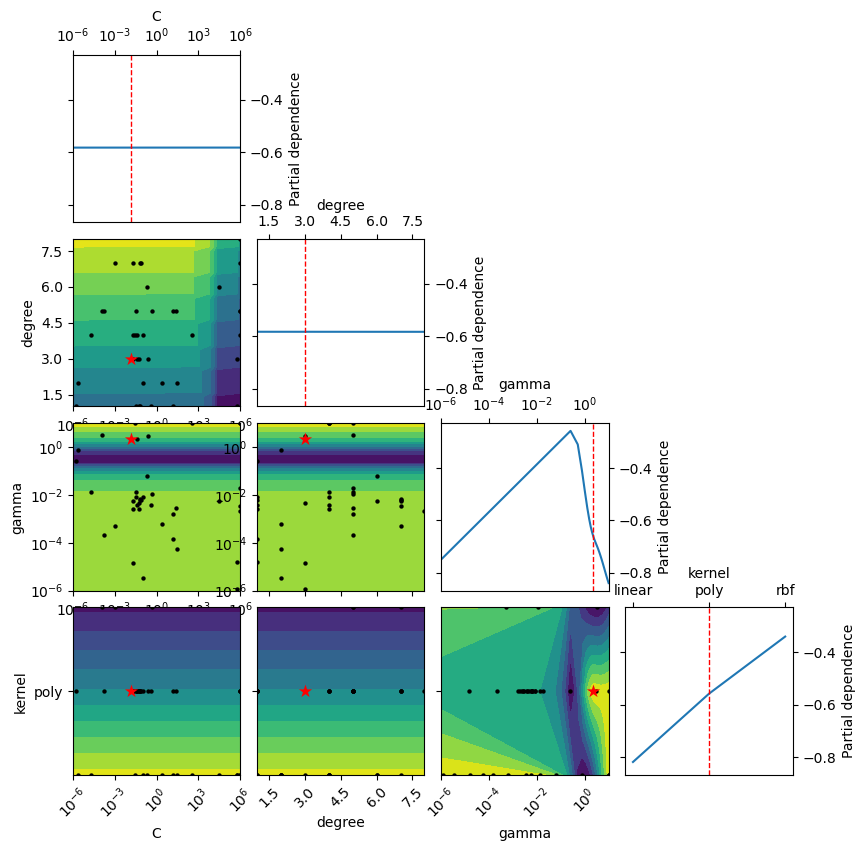

In [6]:
_ = plot_objective(opt.optimizer_results_[0],
                   dimensions=["C", "degree", "gamma", "kernel"],
                   n_minimum_search=int(1e8))
plt.show()

## Experiment tracking 

Searching for the best model and the best parameters for the model is tough, time-consuming work filled with many hours of fitting the model and updating parameters and search functions. Before you know it you have hundreds of models, you are lost in all the numbers, and you have no idea what was the performance of that one good model you liked 4 hours ago let alone what were the best parameters...

I personally end up in this mess often. It gets even worse after a few rounds of this circus. You update the dataset and you have to retrain everything and possibly update some parameters. A new class is introduced to your multiclass model and you have to do everything again. You find a nice new how to upgrade your model and you have to do everything again...

![Experiments tracking](images/experiments_tracking.png)

Luckily several tools can help you manage this mess. Let's look at some of them:

### [MLflow](https://mlflow.org/)

* MLflow is an open-source platform to manage the ML lifecycle, including experimentation, reproducibility, deployment, and a central model registry.
* Integrates with TensorFlow, PyTorch, Keras, Scikit learn, and many many more
* Probably the most used by the community
* But it can be very slow with many tracked experiments

### [Aim](https://aimstack.io/)

* Aim is an open-source, self-hosted ML experiment tracking tool.
* Integrates with TensorFlow, PyTorch, Keras, Scikit learn, and many many more
* Much younger than MLflow but growing fast
* Faster UI even for thousands of experiments

### [Weights & Biases](https://wandb.ai/)

* W&B  is a tool for tracking and visualizing all the pieces of the machine learning pipeline, from datasets to production models.
* Integrates with TensorFlow, PyTorch, Keras, Scikit learn, and many many more
* CLI and Python API is open source but they provide paid hosted solution 
* Great mobile app that lets you monitor or even cancel running experiments

And many more like [Neptune](https://neptune.ai/), [Comet](https://www.comet.com/site/), [TensorBoard](https://www.tensorflow.org/tensorboard), [Guild AI](https://guild.ai/), ...

And one last honorable mention is [DVC](https://dvc.org/) which can do many things like the tools above but it has a great unique feature for dataset tracking and versioning. With DVC you can basically version and track your data in a git-like style.